<a href="https://colab.research.google.com/github/kipsangchepesa/core-module-1/blob/main/Week_5_Matrix_team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the question

### a) Specifying the Data Analytic Question

To carry out exploratory data analysis to identify the trends and causes of fatalities in Australian roads. 

### b) Defining the Metric for Success

To be able to carry out the analysis and identify trends in the road fatalities

### c) Understanding the context 

According to research, there have been more than 189,000 deaths on Australia’s roads. Approximately four people die and 90 people are seriously injured each day. The cost of road trauma to the Australian community is tragic and widespread.
Our project focuses on analyzing crash fatalities data in Australia according to several factors, including gender, age, state,  age group, type of road users, day of the week, and time of the week.


### d) Recording the Experimental Design

1. Loading the dataset to the environment
2. Previewing the data
3. Performing data cleaning
4. Exploratory data analysis
5. Hypothesis testing

### e) Data Relevance

The data is relevant because it has up to date information on road accidents in Australia. This will allow us to analyze the data effectively.

## 2. Reading the data

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the data
df = pd.read_csv('/content/Crash_Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 3. Checking the Data

In [ ]:
# Previewing the data
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [ ]:
# Checking the tail
df.tail()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,60,Passenger,Female,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,110,Passenger,Male,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52842,19896063,Tas,1,1989,Tuesday,12:40,Multiple,No,NaN,No,60,Passenger,Female,63,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Day


In [ ]:
df.shape

(52843, 23)

In [ ]:
df.nunique()

Crash ID                         47567
State                                8
Month                               12
Year                                33
Dayweek                              7
Time                              1413
Crash Type                           2
Bus Involvement                      2
Heavy Rigid Truck Involvement        2
Articulated Truck Involvement        2
Speed Limit                         30
Road User                            7
Gender                               3
Age                                103
National Remoteness Areas            5
SA4 Name 2016                       88
National LGA Name 2017             500
National Road Type                  13
Christmas Period                     2
Easter Period                        2
Age Group                            6
Day of week                          2
Time of day                          2
dtype: int64

In [ ]:
df.dtypes

Crash ID                          int64
State                            object
Month                             int64
Year                              int64
Dayweek                          object
Time                             object
Crash Type                       object
Bus Involvement                  object
Heavy Rigid Truck Involvement    object
Articulated Truck Involvement    object
Speed Limit                      object
Road User                        object
Gender                           object
Age                               int64
National Remoteness Areas        object
SA4 Name 2016                    object
National LGA Name 2017           object
National Road Type               object
Christmas Period                 object
Easter Period                    object
Age Group                        object
Day of week                      object
Time of day                      object
dtype: object

In [ ]:
df.isnull().sum()

Crash ID                             0
State                                0
Month                                0
Year                                 0
Dayweek                              0
Time                                40
Crash Type                           0
Bus Involvement                     22
Heavy Rigid Truck Involvement    20515
Articulated Truck Involvement       22
Speed Limit                        702
Road User                            0
Gender                              27
Age                                  0
National Remoteness Areas        45965
SA4 Name 2016                    45951
National LGA Name 2017           45950
National Road Type               45966
Christmas Period                     0
Easter Period                        0
Age Group                           90
Day of week                          0
Time of day                          0
dtype: int64

In [ ]:
# Drop National Remoteness Areas, SA4 Name 2016, National LGA Name 2017, National Road Type
# Due to missing values 

## 4. External Data Source Validation

It is from the Australian government. From their database of Australian Road Deaths Database (ARDD). It was conducted by the Bureau of Infrastructure and Transport Research Economics. It was then uploaded to Kaggle, by "Deep Contractor". The link to the original dataset is [here](https://data.gov.au/dataset/ds-dga-5b530fb8-526e-4fbf-b0f6-aa24e84e4277/details?q=ardd) 

## 5. Cleaning

In [ ]:
# 1. Dropping the columns with null values
df = df.drop(["National Remoteness Areas", "SA4 Name 2016", "National LGA Name 2017", "National Road Type", "Heavy Rigid Truck Involvement"], axis = 1)

In [ ]:
# 2. Dropping values
df = df.dropna(axis = 0)

In [ ]:
df.isnull().sum()

Crash ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

In [ ]:
# 3. Conversion
df["Time"] = pd.to_datetime(df["Time"])

In [ ]:
df.dtypes

Crash ID                                  int64
State                                    object
Month                                     int64
Year                                      int64
Dayweek                                  object
Time                             datetime64[ns]
Crash Type                               object
Bus Involvement                          object
Articulated Truck Involvement            object
Speed Limit                              object
Road User                                object
Gender                                   object
Age                                       int64
Christmas Period                         object
Easter Period                            object
Age Group                                object
Day of week                              object
Time of day                              object
dtype: object

In [ ]:
# 4. Checking for outliers
df.describe()

,Crash ID,Month,Year,Age
count,5.199700e+04,51997.000000,51997.000000,51997.000000
mean,2.002986e+07,6.552686,2002.699560,39.787315
std,9.413623e+04,3.456646,9.408998,21.732608
min,1.989100e+07,1.000000,1989.000000,0.000000
25%,1.994605e+07,4.000000,1994.000000,22.000000
50%,2.002135e+07,7.000000,2002.000000,34.000000
75%,2.010502e+07,10.000000,2010.000000,55.000000
max,2.021801e+07,12.000000,2021.000000,101.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


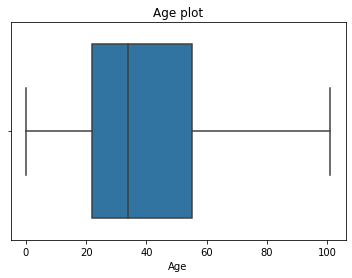

In [ ]:
plt.title("Age plot")
sns.boxplot(df['Age'])
plt.show()

In [ ]:
# No outliers

In [ ]:
# 5. Check for duplicates
df.duplicated().sum()

142

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## 6. Exploratory Analysis

#### Univariate

In [ ]:
df["State"].value_counts()

NSW    16186
Vic    11351
Qld    10440
WA      6122
SA      4527
Tas     1537
NT      1367
ACT      325
Name: State, dtype: int64

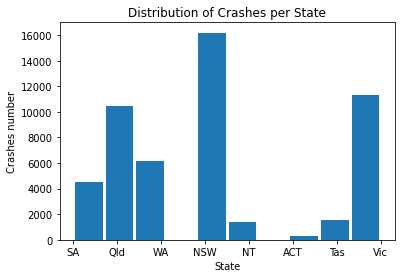

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["State"], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('State')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per State') 
plt.figure(figsize=(4, 3))
plt.show()

In [ ]:
df["Crash Type"].value_counts()

Single      28585
Multiple    23270
Name: Crash Type, dtype: int64

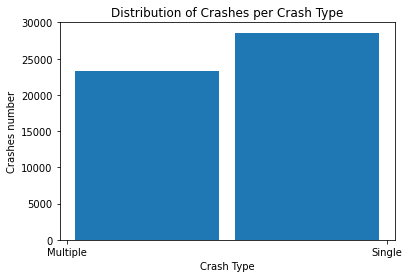

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["Crash Type"], bins=2, histtype='bar', rwidth=0.9)
plt.xlabel('Crash Type')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Crash Type') 
plt.figure(figsize=(4, 3))
plt.show()

In [ ]:
df["Road User"].value_counts()

Driver                          23505
Passenger                       11858
Pedestrian                       8107
Motorcycle rider                 6555
Pedal cyclist                    1402
Motorcycle pillion passenger      358
Other/-9                           70
Name: Road User, dtype: int64

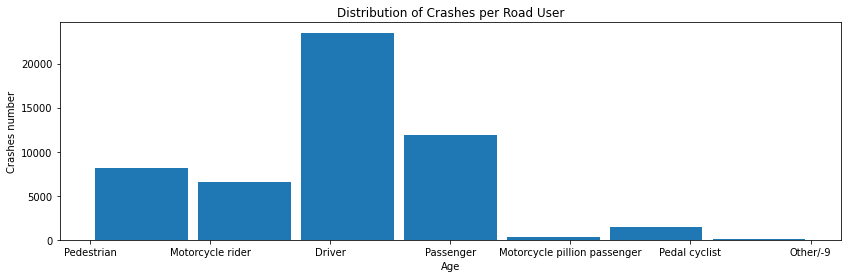

In [ ]:
plt.figure(figsize=(14, 4))
plt.hist(df["Road User"], bins=7, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Road User') 
plt.show()

Specific objective: To determine the number of road fatalities experienced  by different age groups

In [ ]:
df["Age"].value_counts(bins = 10, sort = False)

(-0.10200000000000001, 10.1]     1972
(10.1, 20.2]                     8747
(20.2, 30.3]                    11854
(30.3, 40.4]                     7780
(40.4, 50.5]                     6070
(50.5, 60.6]                     4734
(60.6, 70.7]                     4144
(70.7, 80.8]                     3914
(80.8, 90.9]                     2316
(90.9, 101.0]                     324
Name: Age, dtype: int64

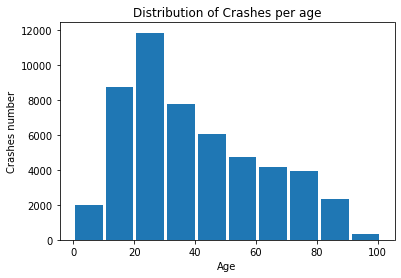

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["Age"], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per age') 
plt.figure(figsize=(4, 3))
plt.show()

Specific objective: To determine the number of road fatalities experienced  by gender

In [ ]:
df["Gender"].value_counts()

Male           37140
Female         14714
Unspecified        1
Name: Gender, dtype: int64

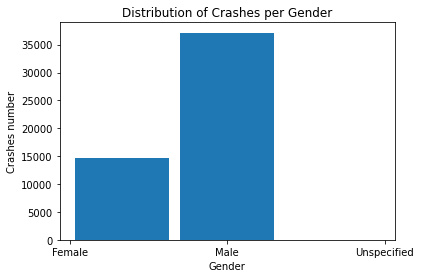

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["Gender"], histtype='bar', rwidth=0.9, bins = 3)
plt.xlabel('Gender')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Gender') 
plt.figure(figsize=(4, 3))
plt.show()

Specific objective: To determine the number of road fatalities occurring on different days of the week

In [ ]:
df["Dayweek"].value_counts()

Saturday     9489
Friday       8500
Sunday       8299
Thursday     6975
Wednesday    6538
Tuesday      6054
Monday       6000
Name: Dayweek, dtype: int64

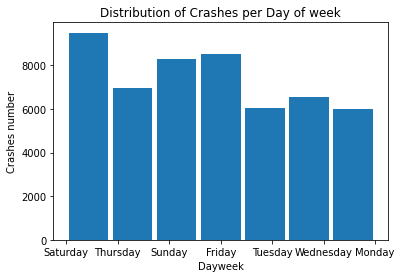

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["Dayweek"], histtype='bar', rwidth=0.9, bins = 7)
plt.xlabel('Dayweek')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.figure(figsize=(4, 3))
plt.show()

In [ ]:
df['Age Group'].value_counts()

17_to_25       13505
40_to_64       13238
26_to_39       12135
75_or_older     5045
0_to_16         3969
65_to_74        3963
Name: Age Group, dtype: int64

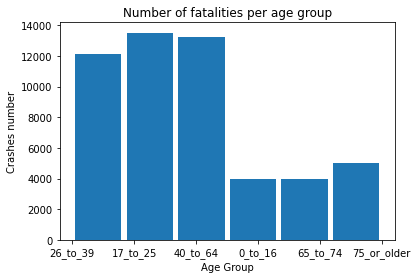

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["Age Group"], histtype='bar', rwidth=0.9, bins = 6)
plt.xlabel('Age Group')
plt.ylabel('Crashes number')
plt.title('Number of fatalities per age group') 
plt.figure(figsize=(4, 3))
plt.show()

In [ ]:
#summary for the age column 
df['Age'].describe()

count    51855.000000
mean        39.828445
std         21.732201
min          0.000000
25%         22.000000
50%         34.000000
75%         55.000000
max        101.000000
Name: Age, dtype: float64

#### Bivariate

Specific objective: To determine the number of road fatalities occurring at different times of the day.

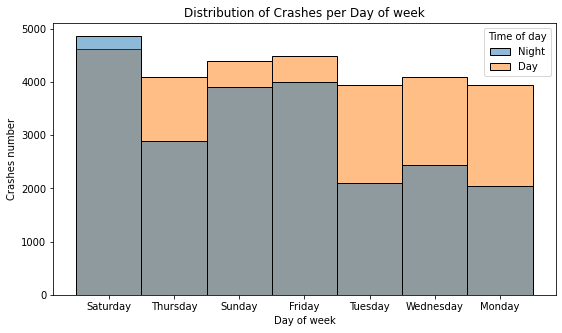

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(x = df["Dayweek"], hue = df["Time of day"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

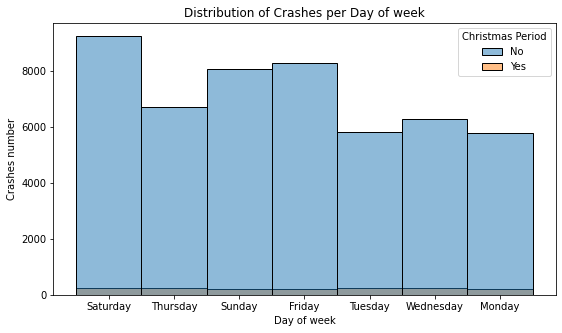

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(x = df["Dayweek"], hue = df["Christmas Period"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

In [ ]:
df[["Dayweek", "Christmas Period"]].value_counts(sort = False)

Dayweek    Christmas Period
Friday     No                  8291
           Yes                  209
Monday     No                  5804
           Yes                  196
Saturday   No                  9259
           Yes                  230
Sunday     No                  8077
           Yes                  222
Thursday   No                  6724
           Yes                  251
Tuesday    No                  5810
           Yes                  244
Wednesday  No                  6297
           Yes                  241
dtype: int64

Because it is one day, few people travel. In that year.

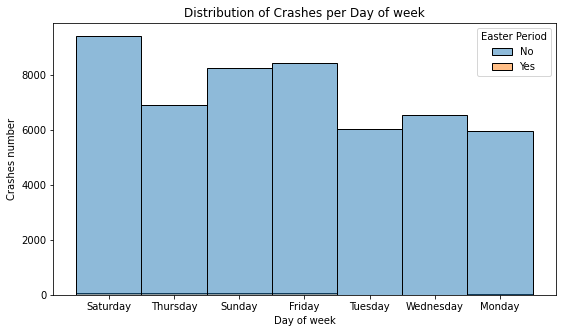

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(x = df["Dayweek"], hue = df["Easter Period"])
plt.xlabel('Day of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week') 
plt.show()

In [ ]:
df[["Dayweek", "Easter Period"]].value_counts(sort = False)

Dayweek    Easter Period
Friday     No               8446
           Yes                54
Monday     No               5955
           Yes                45
Saturday   No               9433
           Yes                56
Sunday     No               8251
           Yes                48
Thursday   No               6917
           Yes                58
Tuesday    No               6052
           Yes                 2
Wednesday  No               6535
           Yes                 3
dtype: int64

They celebrate easter more than christmas. So they travel less. So there are fewer accidents

Specific objective: To determine the number of road fatalities over the period of 1989 to 2021

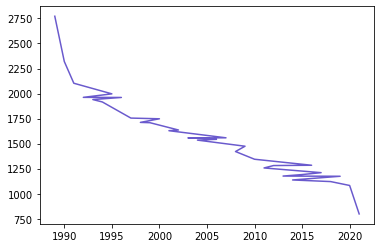

In [ ]:
df['Year'].value_counts().plot.line(color = 'slateblue')

During the 1990's, there was bad road networks. There was bad training. Technology has improved that has improved safety.

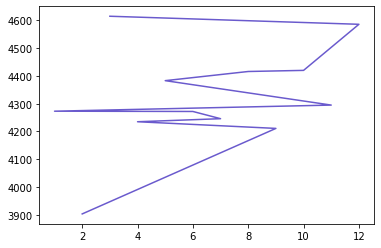

In [ ]:
df['Month'].value_counts().plot.line(color = 'slateblue')

There is not specific month where there is a more fatalities than the other

Specific objective: To determine the number of road fatalities is more on weekends than weekdays.

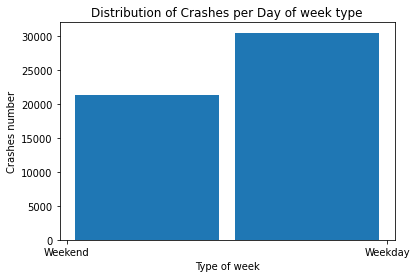

<Figure size 288x216 with 0 Axes>

In [ ]:
plt.hist(df["Day of week"], histtype='bar', rwidth=0.9, bins = 2)
plt.xlabel('Type of week')
plt.ylabel('Crashes number')
plt.title('Distribution of Crashes per Day of week type') 
plt.figure(figsize=(4, 3))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Day of week'] = en.fit_transform(df['Day of week'])
df['State']= en.fit_transform(df['State'])
df['Dayweek']=en.fit_transform(df['Dayweek'])
df['Crash Type']=en.fit_transform(df['Crash Type'])
df['Bus Involvement']=en.fit_transform(df['Bus Involvement'])
df['Articulated Truck Involvement']=en.fit_transform(df['Articulated Truck Involvement'])
df['Road User']=en.fit_transform(df['Road User'])
df['Gender']=en.fit_transform(df['Gender'])
df['Christmas Period']=en.fit_transform(df['Christmas Period'])
df['Easter Period']=en.fit_transform(df['Easter Period'])
df['Time of day']=en.fit_transform(df['Time of day'])
df['Age Group']=en.fit_transform(df['Age Group'])
df['Speed Limit'].replace({'<40':'40','Unspecified':'40'},inplace = True)
df['Speed Limit'] = df['Speed Limit'].astype(int)

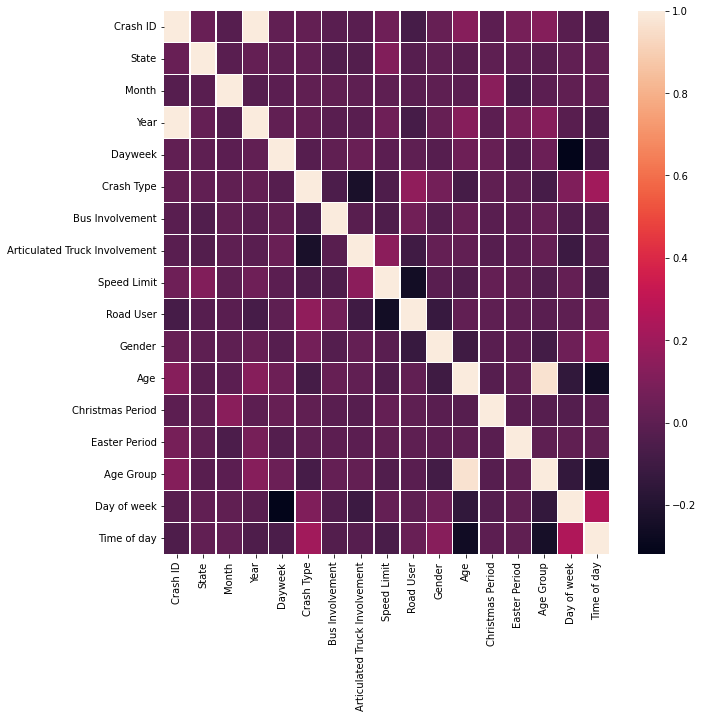

In [ ]:
#df.info()
corr_matrix = df.corr()
corr_matrix
#visualising the corrmatrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_matrix, annot=False,  linewidths=.5, ax=ax)

In [ ]:
df.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
1,20214022,4,9,2021,2,2021-11-09 23:31:00,0,0,0,110,6,0,28,0,0,2,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Multivariate analysis

####Principal Component Analysis

In [ ]:

#Splitting the dataset into the Training set and Test set
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=df[['Crash Type','Christmas Period', 'Easter Period' ]]
sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA()
X = pca.fit_transform(X)

In [ ]:
#getting the variance ration
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33790887, 0.3343618 , 0.32772933])

###Factor Analyzer


In [ ]:
!pip install factor_analyzer==0.2.3

In [ ]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df[['Crash Type','Christmas Period', 'Easter Period' ]], 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


,Original_Eigenvalues
0,1.013727
1,1.003085
2,0.983188


In [ ]:
fa.analyze(df[['Crash Type','Christmas Period', 'Easter Period' ]], 1, rotation="varimax")
fa.loadings

/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:770: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn('No rotation will be performed when '


,Factor1
Crash Type,-0.008032
Christmas Period,-0.997497
Easter Period,0.012787


In [ ]:
#getting the vaiance 
fa.get_factor_variance()

,Factor1
SS Loadings,0.995229
Proportion Var,0.331743
Cumulative Var,0.331743
